# HiGHS example

This notebook demonstrates how to use `OptiWindNet` to design collector system cable layouts using the **MILPRouter with HiGHS solver**.

## Load data

import required modules

In [1]:
from optiwindnet.api import WindFarmNetwork, EWRouter, MILPRouter

In [2]:
# Display figures as SVG in Jupyter notebooks
%config InlineBackend.figure_formats = ['svg']

create an instance of `wfn` using `.from_pbf()`


In [3]:
wfn = WindFarmNetwork.from_pbf(filepath='data/DTU_letters.osm.pbf', cables=7)

<Axes: >

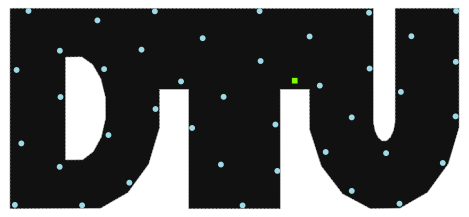

In [4]:
wfn.plot_location()

## Optimize

Warmstart with `EWRouter`:

In [5]:
res_pre_solver= wfn.optimize(router=EWRouter())
print(wfn.length())

1820.1681190424422


In [6]:
milp_router = MILPRouter(solver_name='highs', time_limit=60, mip_gap=0.005, verbose=True)
res = wfn.optimize(router=milp_router)

Using warm start: the model is initialized with the provided solution S.

Running HiGHS 1.10.0 (git hash: fd86653): Copyright (c) 2025 HiGHS under MIT licence terms
RUN!
MIP  has 1093 rows; 708 cols; 3962 nonzeros; 708 integer variables (354 binary)
Coefficient ranges:
  Matrix [1e+00, 7e+00]
  Cost   [2e+01, 2e+02]
  Bound  [1e+00, 7e+00]
  RHS    [1e+00, 4e+01]
Assessing feasibility of MIP using primal feasibility and integrality tolerance of       1e-06
Solution has               num          max          sum
Col     infeasibilities      0            0            0
Integer infeasibilities      0            0            0
Row     infeasibilities      0            0            0
Row     residuals            0            0            0
Presolving model
1093 rows, 708 cols, 3962 nonzeros  0s
963 rows, 690 cols, 3548 nonzeros  0s

MIP start solution is feasible, objective value is 1636.55508911

Solving MIP model with:
   963 rows
   690 cols (337 binary, 353 integer, 0 implied int., 0 c

In [7]:
wfn.G.SolutionInfo

SolutionInfo(runtime=<pyomo.opt.results.container.UndefinedData object at 0x00000225986050A0>, bound=1567.48624539458, objective=1575.3554359240034, relgap=0.004995184166046829, termination='optimal')

In [8]:
wfn.length()

1575.355435924007

<Axes: >

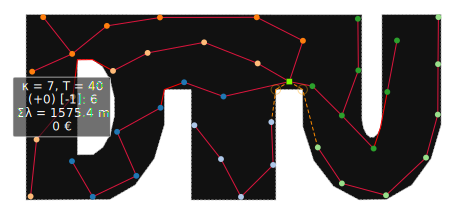

In [9]:
wfn.plot()